📂 Classes Found: ['Bengin cases', 'Malignant cases', 'Normal cases']
Bengin cases: 120 images
Malignant cases: 561 images
Normal cases: 416 images

✅ Balancing all classes to have 120 images each
✅ Classes balanced successfully!
✅ Balanced dataset split into train and test sets!
Found 288 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


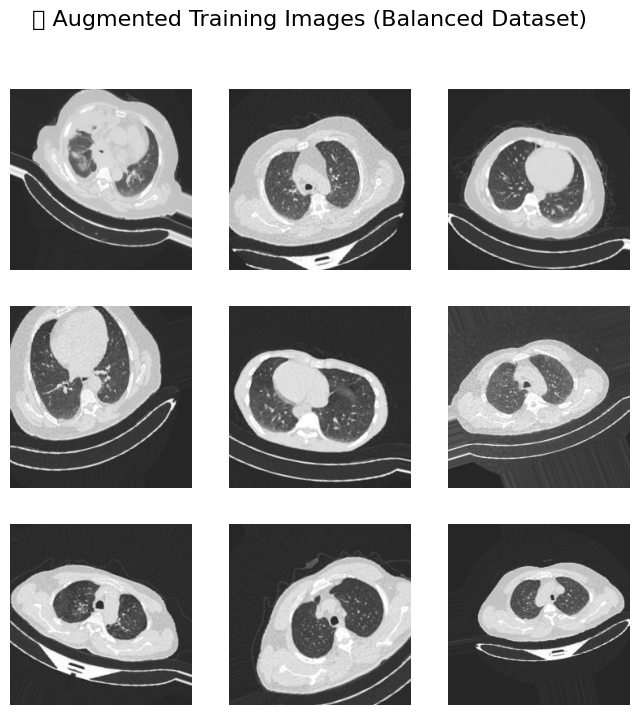

✅ Balanced dataset preprocessing complete and ready for training!


In [2]:
# =====================================================
# 🧩 Lung Cancer Dataset Preprocessing (Balanced Dataset)
# =====================================================

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# =====================================================
# Step 1: Dataset Path Setup
# =====================================================
base_dir = r"C:/Users/gahuk/AAAAA/archive (1)/dataset/lung dataset"  # 🔹 Change this path
class_names = ['Bengin cases', 'Malignant cases', 'Normal cases']

print("📂 Classes Found:", class_names)

# =====================================================
# Step 2: Count Images per Class
# =====================================================
class_counts = {}
for class_name in class_names:
    folder = os.path.join(base_dir, class_name)
    count = len(os.listdir(folder))
    class_counts[class_name] = count
    print(f"{class_name}: {count} images")

# =====================================================
# Step 3: Find Minimum Count to Balance
# =====================================================
min_count = min(class_counts.values())
print(f"\n✅ Balancing all classes to have {min_count} images each")

# =====================================================
# Step 4: Create Balanced Dataset Directory
# =====================================================
balanced_dir = "balanced_dataset"
if os.path.exists(balanced_dir):
    shutil.rmtree(balanced_dir)
os.makedirs(balanced_dir, exist_ok=True)

for class_name in class_names:
    src_folder = os.path.join(base_dir, class_name)
    dst_folder = os.path.join(balanced_dir, class_name)
    os.makedirs(dst_folder, exist_ok=True)
    
    images = os.listdir(src_folder)
    # 🔹 Randomly select equal number of images
    selected_images = np.random.choice(images, min_count, replace=False)
    
    for img in selected_images:
        shutil.copy(os.path.join(src_folder, img), os.path.join(dst_folder, img))

print("✅ Classes balanced successfully!")

# =====================================================
# Step 5: Train-Test Split (Balanced)
# =====================================================
train_dir = os.path.join("balanced_processed", "train")
test_dir = os.path.join("balanced_processed", "test")

for path in [train_dir, test_dir]:
    os.makedirs(path, exist_ok=True)

split_ratio = 0.8  # 80% train, 20% test

for class_name in class_names:
    src_folder = os.path.join(balanced_dir, class_name)
    images = os.listdir(src_folder)
    train_imgs, test_imgs = train_test_split(images, train_size=split_ratio, random_state=42)
    
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    for img in train_imgs:
        shutil.copy(os.path.join(src_folder, img), os.path.join(train_dir, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(src_folder, img), os.path.join(test_dir, class_name, img))

print("✅ Balanced dataset split into train and test sets!")

# =====================================================
# Step 6: Data Augmentation
# =====================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# =====================================================
# Step 7: Preview Some Augmented Images
# =====================================================
plt.figure(figsize=(8, 8))
for i in range(9):
    img, label = next(train_generator)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.axis('off')
plt.suptitle("🩻 Augmented Training Images (Balanced Dataset)", fontsize=16)
plt.show()

print("✅ Balanced dataset preprocessing complete and ready for training!")